<a href="https://colab.research.google.com/github/ckriztian/MDD/blob/main/Cristian_Vera_Actividad_Integradora-MDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BannerPolitecnico](https://politecnico.ar/campus/banner_flat1.jpg)

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Limpieza y verificación de datos**

In [2]:
# Cargando dataframe
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Actividad Integradora - MDD/adult_data.csv', sep = ";", header = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Verificar los primeros registros para confirmar que se cargó correctamente
print(df.head())

   Age         Work_Class  fnlwgt   Education  Eduction_num  \
0   39          State-gov   77516   Bachelors          13.0   
1   50   Self-emp-not-inc   83311   Bachelors          13.0   
2   38            Private  215646     HS-grad           9.0   
3   53            Private  234721        11th           7.0   
4   28            Private  338409   Bachelors          13.0   

        Marital_status          Occupation    Relationship    Rice   Sex  \
0        Never-married        Adm-clerical   Not-in-family   White  Male   
1   Married-civ-spouse     Exec-managerial         Husband   White  Male   
2             Divorced   Handlers-cleaners   Not-in-family   White  Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black  Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black     F   

   Capital_gain  Capital_loss  Hours_per_week  Native_country   Class  
0        2174.0           0.0            40.0   United-States   <=50K  
1           0.0     

**a. Verificación de atributos con datos faltantes**

In [4]:
# Verificar si hay datos faltantes en cada columna
datos_faltantes = df.isnull().sum()

# Mostrar solo las columnas con datos faltantes
datos_faltantes = datos_faltantes[datos_faltantes > 0]

print("Atributos con datos faltantes:")
print(datos_faltantes)

Atributos con datos faltantes:
Work_Class        1836
Eduction_num        30
Occupation        1843
Capital_gain        10
Capital_loss        12
Hours_per_week      16
Native_country     583
dtype: int64


**b. Verificación de atributos que necesiten normalización**

In [5]:
# Tipo de datos, Muestreo y Estadísticas descriptivas
print(df.dtypes)
print("______________")
print(df.head())
print("______________")
print(df.describe())

Age                 int64
Work_Class         object
fnlwgt              int64
Education          object
Eduction_num      float64
Marital_status     object
Occupation         object
Relationship       object
Rice               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_week    float64
Native_country     object
Class              object
dtype: object
______________
   Age         Work_Class  fnlwgt   Education  Eduction_num  \
0   39          State-gov   77516   Bachelors          13.0   
1   50   Self-emp-not-inc   83311   Bachelors          13.0   
2   38            Private  215646     HS-grad           9.0   
3   53            Private  234721        11th           7.0   
4   28            Private  338409   Bachelors          13.0   

        Marital_status          Occupation    Relationship    Rice   Sex  \
0        Never-married        Adm-clerical   Not-in-family   White  Male   
1   Married-civ-spouse     Exec-managerial        

In [6]:
# Verificar el rango de cada variable numérica
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")


Age: Min = 17, Max = 190
fnlwgt: Min = 12285, Max = 1484705
Eduction_num: Min = 1.0, Max = 16.0
Capital_gain: Min = 0.0, Max = 99999.0
Capital_loss: Min = 0.0, Max = 4356.0
Hours_per_week: Min = 1.0, Max = 99.0


####################################

**Halazgo:** A primera vista, se observa que la columna 'Sexo' contiene varios valores con el mismo significado, lo que sugiere la necesidad de una normalización. De manera similar, en la columna 'Class' hay un conjunto de caracteres para cada valor; se recomienda corregir esto y utilizar números para su identificación. Además, el atributo 'education_num' presenta un error de escritura que debería ser corregido.

####################################

**c. Identifica si hay atributos con valores inválidos**

In [7]:
# Cambiar el nombre de la columna Eduction_num por Education_num
df.rename(columns={'Eduction_num': 'Education_num'}, inplace=True)

# Verificar que el nombre ha sido cambiado
print(df.columns)

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Rice', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Class'],
      dtype='object')


In [8]:
for column in df.columns:
    # Convertir a string para evitar errores con tipos no string
    column_as_string = df[column].astype(str)

    # Detectar espacios al inicio
    espacios_al_inicio = column_as_string.str.startswith(' ')

    # Verificar si hay valores con espacios al inicio
    if espacios_al_inicio.any():
        valores_con_espacios_inicio = df[espacios_al_inicio]
        print(f"\nValores con espacios al inicio en '{column}':")
        print(valores_con_espacios_inicio)


Valores con espacios al inicio en 'Work_Class':
       Age         Work_Class  fnlwgt    Education  Education_num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            Marital_status          Occupation    Relationship    Rice  \
0            Never-married        Adm-clerical  

In [9]:
# Eliminar espacios en blanco al principio y al final de todos los valores en el DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Mostrar el DataFrame actualizado
print(df)

<ipython-input-9-dc661add6960>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


       Age        Work_Class  fnlwgt   Education  Education_num  \
0       39         State-gov   77516   Bachelors           13.0   
1       50  Self-emp-not-inc   83311   Bachelors           13.0   
2       38           Private  215646     HS-grad            9.0   
3       53           Private  234721        11th            7.0   
4       28           Private  338409   Bachelors           13.0   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm           12.0   
32557   40           Private  154374     HS-grad            9.0   
32558   58           Private  151910     HS-grad            9.0   
32559   22           Private  201490     HS-grad            9.0   
32560   52      Self-emp-inc  287927     HS-grad            9.0   

           Marital_status         Occupation   Relationship   Rice     Sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [10]:
# Verificar si hay datos faltantes en cada columna
datos_faltantes = df.isnull().sum()

# Mostrar solo las columnas con datos faltantes
datos_faltantes = datos_faltantes[datos_faltantes > 0]

print("Atributos con datos faltantes:")
print(datos_faltantes)

Atributos con datos faltantes:
Work_Class        1836
Education_num       30
Occupation        1843
Capital_gain        10
Capital_loss        12
Hours_per_week      16
Native_country     583
dtype: int64


## **2. Relación de Campos**


In [11]:
# Inspección de datos

# Valores únicos en Education
print(df['Education'].unique())

# Comprobar los primeros registros para ver la relación
print(df[['Education', 'Education_num']].head(15))


['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
       Education  Education_num
0      Bachelors           13.0
1      Bachelors           13.0
2        HS-grad            9.0
3           11th            7.0
4      Bachelors           13.0
5        Masters           14.0
6            9th            5.0
7        HS-grad            NaN
8        Masters           14.0
9      Bachelors           13.0
10  Some-college           10.0
11     Bachelors           13.0
12     Bachelors           13.0
13    Assoc-acdm           12.0
14     Assoc-voc           11.0


In [12]:
# Contar los valores únicos en las columnas 'Education' y 'Education_num'
unique_education_counts = df[['Education', 'Education_num']].nunique()
print(unique_education_counts)

Education        16
Education_num    16
dtype: int64


In [13]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['Education'], df['Education_num'])
print(contingency_table)

Education_num  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0    9.0   10.0  \
Education                                                                    
10th              0     0     0     0     0   931     0     0      0     0   
11th              0     0     0     0     0     0  1174     0      0     0   
12th              0     0     0     0     0     0     0   432      0     0   
1st-4th           0   168     0     0     0     0     0     0      0     0   
5th-6th           0     0   333     0     0     0     0     0      0     0   
7th-8th           0     0     0   646     0     0     0     0      0     0   
9th               0     0     0     0   514     0     0     0      0     0   
Assoc-acdm        0     0     0     0     0     0     0     0      0     0   
Assoc-voc         0     0     0     0     0     0     0     0      0     0   
Bachelors         0     0     0     0     0     0     0     0      0     0   
Doctorate         0     0     0     0     0     0     0     0   

**Hallazgo:** Al analizar los valores de las columnas 'Education' y 'Education_num', así como el conteo de características únicas y la tabla de contingencia, se puede concluir que cada valor en la columna 'Education' está asociado a un 'ID' correspondiente en la columna 'Education_num'. Esto indica una relación directa entre las categorías educativas y su representación numérica.

## **3. Reemplazo de Valores Faltantes**

In [14]:
# Verificar si hay datos faltantes en cada columna
datos_faltantes = df.isnull().sum()

# Mostrar solo las columnas con datos faltantes
datos_faltantes = datos_faltantes[datos_faltantes > 0]

print("Atributos con datos faltantes:")
print(datos_faltantes)

Atributos con datos faltantes:
Work_Class        1836
Education_num       30
Occupation        1843
Capital_gain        10
Capital_loss        12
Hours_per_week      16
Native_country     583
dtype: int64


**a. Completa los valores faltantes de los atributos Education_num y Capital_Loss con el valor mínimo.**

In [15]:
# Verificar valores faltantes en la columna 'Education_num'
valores_faltantes = df['Education_num'].isna().sum()

print(f"Valores faltantes en 'Education_num': {valores_faltantes}")

Valores faltantes en 'Education_num': 30


In [16]:
# Filtrar filas donde 'Education_num' contiene NaN y mostrar 'Education' junto con 'Education_num'
faltantes_education_num = df[df['Education_num'].isna()][['Education', 'Education_num']]

print("Valores faltantes en 'Education_num' respecto de 'Education':")
print(faltantes_education_num)


Valores faltantes en 'Education_num' respecto de 'Education':
          Education  Education_num
7           HS-grad            NaN
528         HS-grad            NaN
888         HS-grad            NaN
1755      Bachelors            NaN
2395           12th            NaN
2955   Some-college            NaN
3475   Some-college            NaN
4095        HS-grad            NaN
4915           11th            NaN
5595        HS-grad            NaN
6435        HS-grad            NaN
7315        HS-grad            NaN
8295   Some-college            NaN
9235   Some-college            NaN
10135       Masters            NaN
11175  Some-college            NaN
12215       HS-grad            NaN
13235  Some-college            NaN
14635       Masters            NaN
15455       HS-grad            NaN
16595       Masters            NaN
17575          10th            NaN
18555       HS-grad            NaN
19775          10th            NaN
21055  Some-college            NaN
22115       HS-grad         

In [17]:
# Definir el mapeo de valores de Education a Education_num
education_mapping = {
    "Preschool": 1,
    "1st-4th": 2,
    "5th-6th": 3,
    "7th-8th": 4,
    "9th": 5,
    "10th": 6,
    "11th": 7,
    "12th": 8,
    "HS-grad": 9,
    "Some-college": 10,
    "Assoc-voc": 11,
    "Assoc-acdm": 12,
    "Bachelors": 13,
    "Masters": 14,
    "Prof-school": 15,
    "Doctorate": 16
}

# Reemplazar los valores vacíos en Education_num
df['Education_num'] = df.apply(
    lambda row: education_mapping[row['Education']] if pd.isna(row['Education_num']) else row['Education_num'],
    axis=1
)

# Verificar valores faltantes en la columna 'Education_num'
valores_faltantes = df['Education_num'].isna().sum()
print(f"\nValores faltantes en 'Education_num': {valores_faltantes}")


Valores faltantes en 'Education_num': 0


In [18]:
# Verificar valores faltantes en la variable 'Capital_loss'
valores_faltantes_cl = df['Capital_loss'].isna().sum()

print(f"\nValores faltantes en 'Capital_loss': {valores_faltantes_cl}")


Valores faltantes en 'Capital_loss': 12


In [19]:
# Calcular el valor mínimo de 'Capital_loss'
valor_minimo = df['Capital_loss'].min()

# Completar valores faltantes con el valor mínimo
df['Capital_loss'] = df['Capital_loss'].fillna(valor_minimo)

# Verificar valores faltantes en la variable 'Capital_loss'
valores_faltantes_cl = df['Capital_loss'].isna().sum()
print(f"\nValores faltantes en 'Capital_loss': {valores_faltantes_cl}")


Valores faltantes en 'Capital_loss': 0


**b. Completa el resto de los atributos que presenten valores faltantes con su correspondiente valor promedio.**

In [20]:
# Verificar si hay datos faltantes en cada columna
datos_faltantes = df.isnull().sum()

# Mostrar solo las columnas con datos faltantes
datos_faltantes = datos_faltantes[datos_faltantes > 0]

print("Atributos con datos faltantes:\n")
print(datos_faltantes)

Atributos con datos faltantes:

Work_Class        1836
Occupation        1843
Capital_gain        10
Hours_per_week      16
Native_country     583
dtype: int64


In [21]:
# Completar valores faltantes en 'Work_Class' y 'Occupation' con "not-specified"
df['Work_Class'] = df['Work_Class'].fillna("Not-specified")
df['Occupation'] = df['Occupation'].fillna("Not-specified")

# Completar valores faltantes con el valor promedio para los atributos numéricos
df['Capital_gain'] = df['Capital_gain'].fillna(df['Capital_gain'].mean())
df['Hours_per_week'] = df['Hours_per_week'].fillna(df['Hours_per_week'].mean())

# Para 'Native_country', usar el valor más frecuente (moda)
df['Native_country'] = df['Native_country'].fillna(df['Native_country'].mode()[0])

# Mostrar el DataFrame actualizado
df.head()

,Age,Work_Class,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Rice,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,F,0.0,0.0,40.0,Cuba,<=50K


## **4. Generación de Atributos Nuevos**

In [22]:
# Mapeo de todos los valores a un formato uniforme de las variables Sex y Class
mapping_sex = {
    "F": "Female",
    "M": "Male",
    "Female": "Female",
    "Male": "Male"
}
mapping_class = {
    "<=50K": 0,
    ">50K": 1
}

# Reemplazar los valores en la columna 'Sex'
df['Sex'] = df['Sex'].replace(mapping_sex)
df['Class'] = df['Class'].replace(mapping_class)

# Verificar los valores únicos en la columna 'Sex' después de la limpieza
print(df['Sex'].unique())
print(df['Class'].unique())

['Male' 'Female']
[0 1]


<ipython-input-22-5ae798bd318b>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace(mapping_class)


In [23]:
df.head()

,Age,Work_Class,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Rice,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


Visualizacion de Outliers a traves de graficos 'boxplot'

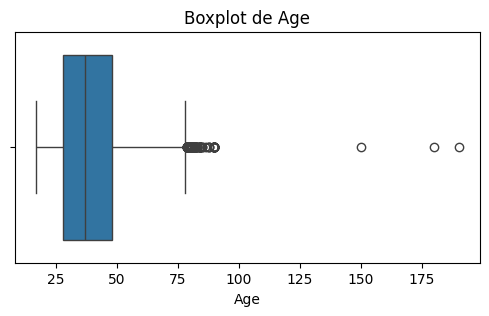

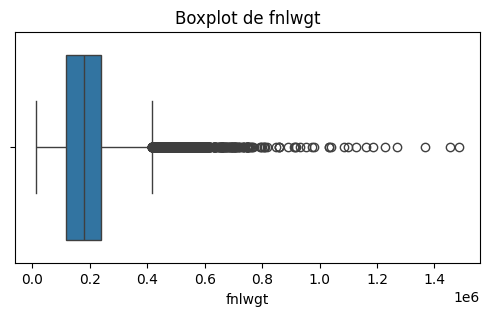

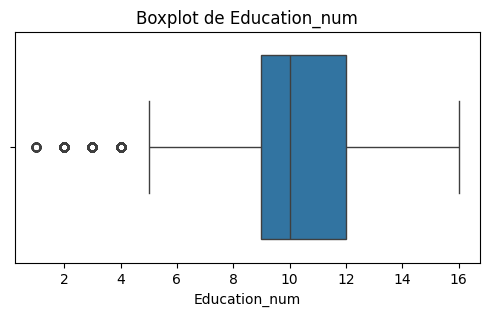

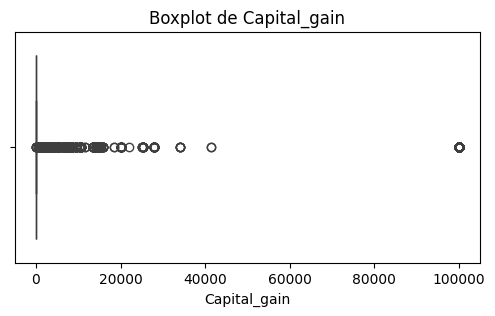

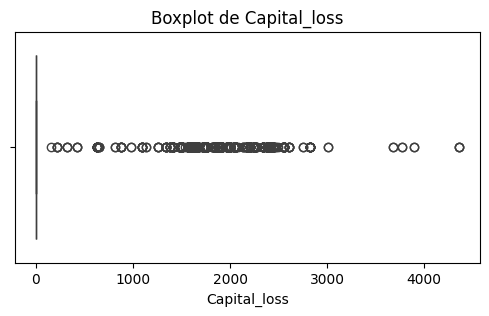

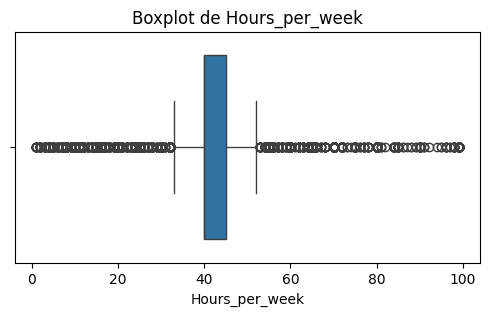

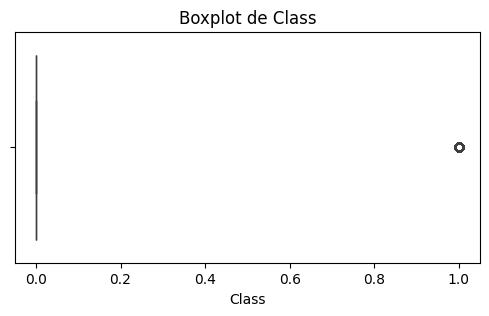

In [24]:
# Lista de columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Crear un boxplot para cada columna numérica
for column in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

In [25]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.95)
IQR = Q3 - Q1

# Definir límites inferiores y superiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el dataframe, eliminando los outliers de 'Age'
df_sin_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Verificar el resultado
df_sin_outliers.shape  # Comprobar la nueva cantidad de filas

(32558, 15)

In [26]:
# Crear una copia del DataFrame original con todos los cambios aplicados
dataframe = df_sin_outliers.copy()
dataframe.describe()

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Class
count,32558.000000,3.255800e+04,32558.000000,32558.000000,32558.000000,32558.000000,32558.000000
mean,38.576909,1.897804e+05,10.080717,1077.988199,87.311874,40.437711,0.240832
std,13.632128,1.055516e+05,2.572832,7385.595954,402.977912,12.344453,0.427595
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370492e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [27]:
dataframe.head()

,Age,Work_Class,fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Rice,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


## **3. Discretización del Atributo Hours_per_week**

In [28]:
# Discretización en cuatro intervalos de partes iguales
dataframe['Hours_per_week_equal_bins'] = pd.cut(dataframe['Hours_per_week'], bins=4)


In [29]:
# Definir los límites de los intervalos personalizados
bins_custom = [1, 10, 50, 70, dataframe['Hours_per_week'].max()]
labels_custom = ['1-10', '11-50', '51-70', '71-MAX']

# Discretización en intervalos personalizados
dataframe['Hours_per_week_custom_bins'] = pd.cut(dataframe['Hours_per_week'], bins=bins_custom, labels=labels_custom)


In [30]:
# Discretización en cuatro intervalos de partes iguales
dataframe['Hours_per_week_five_equal_bins'] = pd.cut(dataframe['Hours_per_week'], bins=5)

In [31]:
# Contar los elementos en cada intervalo para cada discretización
equal_bins_counts = dataframe['Hours_per_week_equal_bins'].value_counts().sort_index()
custom_bins_counts = dataframe['Hours_per_week_custom_bins'].value_counts().sort_index()
five_equal_bins_counts = dataframe['Hours_per_week_five_equal_bins'].value_counts().sort_index()

print("Discretización en cuatro intervalos iguales:\n", equal_bins_counts)
print("_____\n")
print("Discretización en cinco intervalos iguales:\n", five_equal_bins_counts)
print("_____\n")
print("Discretización en intervalos personalizados:\n", custom_bins_counts)


Discretización en cuatro intervalos iguales:
 Hours_per_week_equal_bins
(0.902, 25.5]     3941
(25.5, 50.0]     24977
(50.0, 74.5]      3216
(74.5, 99.0]       424
Name: count, dtype: int64
_____

Discretización en cinco intervalos iguales:
 Hours_per_week_five_equal_bins
(0.902, 20.6]     2926
(20.6, 40.2]     20040
(40.2, 59.8]      7008
(59.8, 79.4]      2243
(79.4, 99.0]       341
Name: count, dtype: int64
_____

Discretización en intervalos personalizados:
 Hours_per_week_custom_bins
1-10        716
11-50     28182
51-70      3142
71-MAX      498
Name: count, dtype: int64


####################################

**Hallazgo:** Comparando las tres discretizaciones, parece ser que la discretización en intervalos personalizados es la más informativa, ya que refleja de manera más precisa los rangos de horas que. La mayoría de los registros están en el intervalo 11-50, lo que indica que este rango de horas es el más común.
Comparando a la discretización en cuatro intervalos iguales, la mayoría de los datos están en el intervalo (25.5, 50.0], lo que indica que la mayor parte de las personas trabaja entre 25 y 50 horas.

####################################

## **4. Análisis de Atributos Seleccionados**

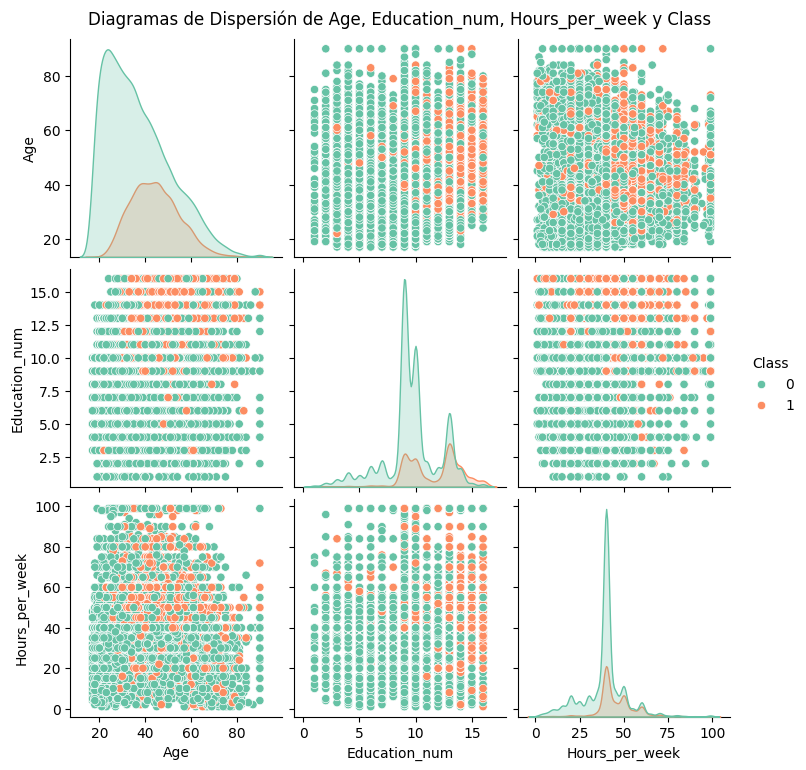

In [44]:
# Selecciona solo las columnas necesarias
selected_columns = dataframe[['Age','Education_num','Hours_per_week','Class']]

# Crear un pairplot
sns.pairplot(selected_columns, hue='Class', palette='Set2')
plt.suptitle('Diagramas de Dispersión de Age, Education_num, Hours_per_week por Class', y=1.02)
plt.show()

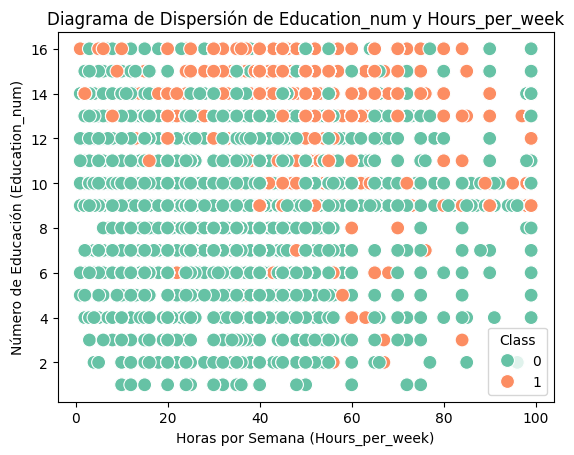

In [51]:
sns.scatterplot(data=dataframe, x='Hours_per_week', y='Education_num', hue='Class', palette='Set2', s=100)

# Ajustar el título y los ejes

plt.title('Diagrama de Dispersión de Education_num y Hours_per_week')
plt.xlabel('Horas por Semana (Hours_per_week)')
plt.ylabel('Número de Educación (Education_num)')
plt.legend(title='Class')
plt.show()

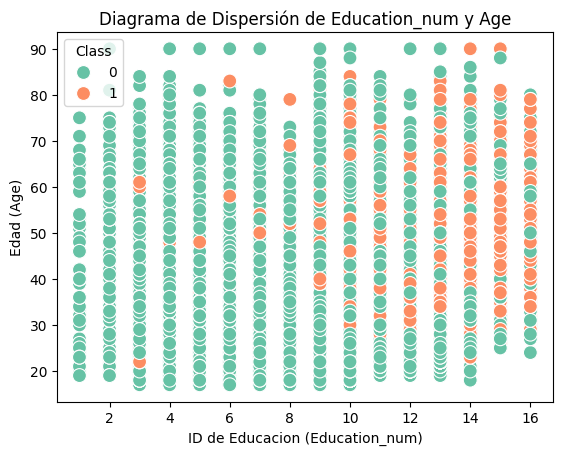

In [45]:
sns.scatterplot(data=dataframe, x='Education_num', y='Age', hue='Class', palette='Set2', s=100)

# Ajustar el título y los ejes

plt.title('Diagrama de Dispersión de Education_num y Age')
plt.xlabel('ID de Educacion (Education_num)')
plt.ylabel('Edad (Age)')
plt.legend(title='Class')
plt.show()


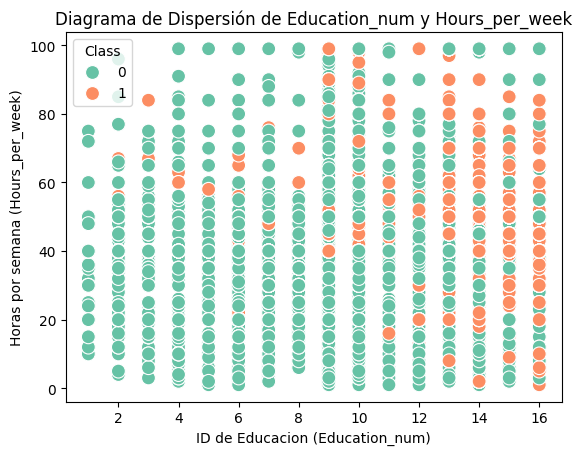

In [50]:
sns.scatterplot(data=dataframe, x='Education_num', y='Hours_per_week', hue='Class', palette='Set2', s=100)

# Ajustar el título y los ejes

plt.title('Diagrama de Dispersión de Education_num y Hours_per_week')
plt.xlabel('ID de Educacion (Education_num)')
plt.ylabel('Horas por semana (Hours_per_week)')
plt.legend(title='Class')
plt.show()


####################################

**Preguntas:**

a. ¿Qué puedes decir de las edades con respecto a la ganancia
anual?

b. ¿Puedes afirmar que las personas que poseen un nivel
educativo por debajo de 8 y que trabajan menos de 40 horas no
ganan más de 50 mil dólares por año?

c. ¿Existe alguna relación entre el nivel educativo y el hecho de
ganar más de 50 mil dólares por año?

d. ¿Hay alguna relación con la cantidad de horas semanales
trabajadas?

**Respuestas:**

a. Al analizar el diagrama de dispersión que muestra las edades en relación con las ganancias, se observa una tendencia en la que, a medida que la edad aumenta, también tienden a aumentar las ganancias. En este gráfico, el valor 0 representa a aquellos con ingresos iguales o superiores a 50K, mientras que el valor 1 corresponde a aquellos con ingresos inferiores a 50K.

b. Es correcto afirmar que las personas que poseen un nivel educativo por debajo de 8 y que trabajen menos de 40 horas no ganan más de 50K, se debe a que los niveles educativos que corresponden a menos de 8 representa un rango de educación primaria y secundaria.

c. Sí, existe una relación significativa entre el nivel educativo y el hecho de ganar más de 50K por año. Esto se debe porque a medida que aumenta el nivel educativo, también se amplían las oportunidades laborales que ofrecen salarios más altos.

d. Se observa una clara tendencia entre las personas que trabajan entre 25 y 50 horas semanales, donde la mayoría gana menos de 50K. Sin embargo, también hay un número notable de individuos en este rango de horas que ganan más de 50K, aunque representan una minoría. A medida que aumenta el número de horas trabajadas, también tienden a incrementarse los ingresos. Esta discrepancia podría estar relacionada con el nivel educativo de los trabajadores.

####################################

![BannerPolitecnico](https://politecnico.ar/campus/banner_flat1.jpg)